<a href="https://colab.research.google.com/github/Malaika-05/AI-Training/blob/main/Week05_01(hw).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/spam.csv',encoding='latin1')

Dataset Cleaning

Remove unnecessary columns and rename useful ones.

In [4]:
# Keep only useful columns
df = df[['v1', 'v2']]

# Rename columns for clarity
df.columns = ['label', 'text']

Display Dataset Shape & Class Distribution

This tells:

How many total messages

How many are spam vs ham

In [5]:
# Dataset shape
print("Dataset Shape:", df.shape)

# Class distribution
df['label'].value_counts()

Dataset Shape: (5572, 2)


,count
label,
ham,4825
spam,747


Text Preprocessing

What preprocessing includes


✔ Lowercasing

✔ Remove punctuation

✔ Remove URLs

✔ Remove stopwords

✔ Tokenization

In [6]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+', '', text)   # remove URLs
    text = re.sub(r'[^a-z\s]', '', text)         # remove punctuation
    words = text.split()                         # tokenization
    words = [w for w in words if w not in stop_words]
    return " ".join(words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Apply Preprocessing

In [7]:
df['clean_text'] = df['text'].apply(preprocess_text)

Show Before & After Example

In [8]:
print("Before Preprocessing:\n", df['text'][2])
print("\nAfter Preprocessing:\n", df['clean_text'][2])

Before Preprocessing:
 Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

After Preprocessing:
 free entry wkly comp win fa cup final tkts st may text fa receive entry questionstd txt ratetcs apply overs


Bag of Words (BoW)

What BoW does

Converts text into word counts

Creates a document-term matrix


Vocabulary size = total unique words

Matrix shape = (documents, words)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

bow = CountVectorizer()
X_bow = bow.fit_transform(df['clean_text'])

print("BoW Vocabulary Size:", len(bow.vocabulary_))
print("BoW Feature Matrix Shape:", X_bow.shape)

BoW Vocabulary Size: 8327
BoW Feature Matrix Shape: (5572, 8327)


TF-IDF
What TF-IDF does

Weighs important words higher

Reduces impact of common words

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    min_df=2,
    max_df=0.9
)

X_tfidf = tfidf.fit_transform(df['clean_text'])

print("TF-IDF Vocabulary Size:", len(tfidf.vocabulary_))
print("TF-IDF Feature Matrix Shape:", X_tfidf.shape)

TF-IDF Vocabulary Size: 3723
TF-IDF Feature Matrix Shape: (5572, 3723)


Encode Labels

Models understand numbers, not text.


In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df['label'])   # ham=0, spam=1

In [14]:
from sklearn.model_selection import train_test_split

Xb_train, Xb_test, y_train, y_test = train_test_split(
    X_bow, y, test_size=0.2, random_state=42)

Xt_train, Xt_test, _, _ = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42)

Naive Bayes (BoW)

In [15]:
from sklearn.naive_bayes import MultinomialNB

nb_bow = MultinomialNB()
nb_bow.fit(Xb_train, y_train)

MultinomialNB()

Naive Bayes (TF-IDF)

In [16]:
nb_tfidf = MultinomialNB()
nb_tfidf.fit(Xt_train, y_train)

MultinomialNB()

In [24]:
y_pred_nb_tfidf = nb_tfidf.predict(Xt_test)

In [25]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_nb_tfidf)
print("Naive Bayes (TF-IDF) Accuracy:", accuracy)

Naive Bayes (TF-IDF) Accuracy: 0.9739910313901345


In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test, y_pred_nb_tfidf))
print("Precision:", precision_score(y_test, y_pred_nb_tfidf))
print("Recall:", recall_score(y_test, y_pred_nb_tfidf))
print("F1 Score:", f1_score(y_test, y_pred_nb_tfidf))

Accuracy: 0.9739910313901345
Precision: 1.0
Recall: 0.8066666666666666
F1 Score: 0.8929889298892989


Logistic Regression (TF-IDF)

In [17]:
from sklearn.linear_model import LogisticRegression

lr_balanced = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)

lr_balanced.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

Predictions

In [22]:
pred_bow = nb_bow.predict(Xb_test)
pred_tfidf_nb = nb_tfidf.predict(Xt_test)
y_pred_balanced = lr_balanced.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test, y_pred_balanced))
print("Precision:", precision_score(y_test, y_pred_balanced))
print("Recall:", recall_score(y_test, y_pred_balanced))
print("F1 Score:", f1_score(y_test, y_pred_balanced))

Accuracy: 0.9757847533632287
Precision: 0.9183673469387755
Recall: 0.9
F1 Score: 0.9090909090909091


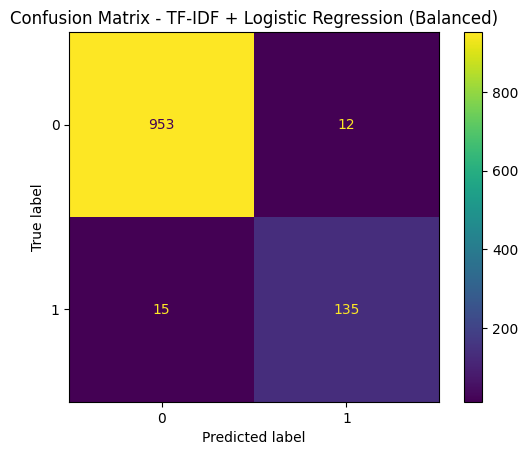

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_balanced)

disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title("Confusion Matrix - TF-IDF + Logistic Regression (Balanced)")
plt.show()

| Feature Method | Classifier                     | Accuracy | Precision | Recall | F1     |
| -------------- | ------------------------------ | -------- | --------- | ------ | ------ |
| BoW            | Naive Bayes                    | 0.9471   | 0.9596    | 0.6333 | 0.7631 |
| TF-IDF         | Naive Bayes                    | 0.9740   | 1.0000    | 0.8067 | 0.8930 |
| TF-IDF         | Logistic Regression (Balanced) | 0.9758   | 0.9184    | 0.9000 | 0.9091 |
